In [1]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:11<00:00, 103MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [3]:
path

'/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1'

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:08<00:00, 173MB/s]
100% 1.06G/1.06G [00:08<00:00, 137MB/s]


In [5]:
import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import tensorflow
from tensorflow import keras
from tensorflow .keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization


In [ ]:
# Generator
# make it the data into small batchs by which small batchs training data step by step ...

In [ ]:
# keras.utils.image_dataset_from_directory(
#      directory = "/content/dogs-vs-cats/train",
#      labels = "inferred" ,
#      label_mode = "int",
#       batch_size = 32 ,
#      image_size = (256 ,256)
# )

In [14]:
 train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train' ,   # data for the training data
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
# data for the test data
validataion_ds=keras.utils.image_dataset_from_directory(
    directory = "/content/dogs-vs-cats/test" ,  # data for the training data ,
    labels = "inferred",
    label_mode =  'int',
    batch_size = 32,
    image_size = (256 ,256 )
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
# Normalized the data into range=> (0,1 )
def process(image , label):
  image = tensorflow.cast(image/255. , tensorflow.float32)    # they are prefome the Transfromation
  return image , label

train_ds = train_ds.map(process)
validataion_ds = validataion_ds.map(process)

In [10]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
# CNN model
model  = Sequential( )

model .add(Conv2D(32 , kernel_size = (3,3) , padding = "valid" , activation = "relu"  , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) ,strides = 2, padding = "valid" ))

model.add(Conv2D(32 , kernel_size = (3,3) , padding = "valid"  , activation = "relu" ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2 ,  padding = "valid"))

model.add(Flatten())

model.add(Dense(128 ,activation = "relu" ))
model.add(Dropout(0.2))
model.add(Dense(64 ,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1 ,activation = "sigmoid"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,763,873 (60.13 MB)

 Trainable params: 15,763,745 (60.13 MB)

 Non-trainable params: 128 (512.00 B)

In [17]:
# now compile the model
history = model.compile(loss = "binary_crossentropy"  , optimizer = "adam",metrics = ["accuracy"] )

In [18]:
Momi =model.fit(train_ds, epochs  = 10,validation_data = validataion_ds, batch_size = 32)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 78ms/step - accuracy: 0.5556 - loss: 2.8612 - val_accuracy: 0.6628 - val_loss: 1.1012
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 71ms/step - accuracy: 0.6499 - loss: 0.6380 - val_accuracy: 0.6992 - val_loss: 0.6329
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7128 - loss: 0.5602 - val_accuracy: 0.7120 - val_loss: 0.5396
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.7639 - loss: 0.4882 - val_accuracy: 0.7748 - val_loss: 0.4908
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.8125 - loss: 0.4162 - val_accuracy: 0.7686 - val_loss: 0.4854
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.8554 - loss: 0.3336 - val_accuracy: 0.7402 - val_loss: 0.6051
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.8902 - loss: 0.2676 - val_accuracy: 0.7132 - val_loss: 0.8811
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9134 - loss: 0.2129 - 

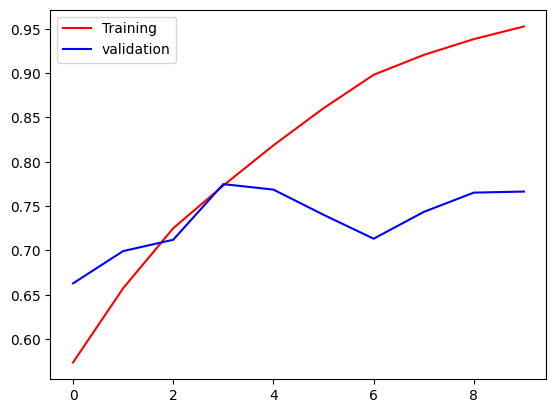

In [21]:
plt.plot(Momi.history["accuracy"],color ="red", label = "Training")
plt.plot(Momi.history["val_accuracy"],color = "blue",label = "validation")
plt.legend()
plt.show()

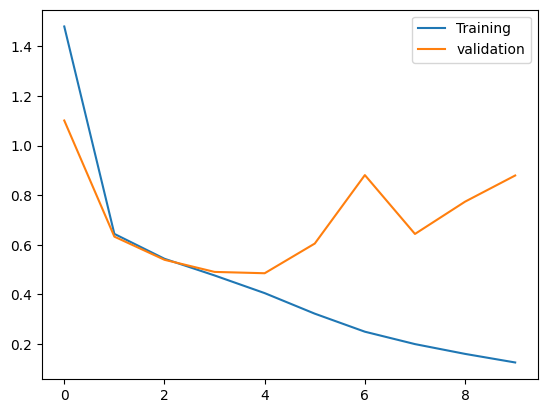

In [22]:
plt.plot(Momi.history["loss"] ,label = "Training")
plt.plot(Momi.history["val_loss"] ,label = "validation")
plt.legend()
plt.show()

# **Predication of cats vs Dogs **

In [23]:
import cv2

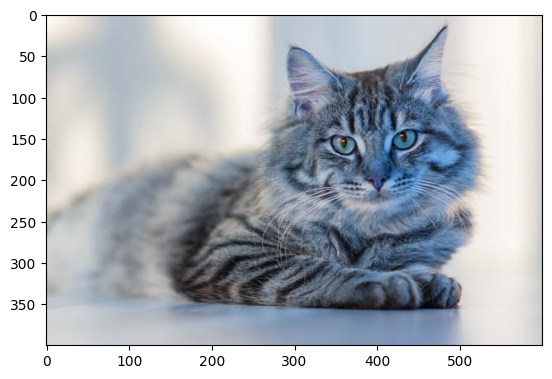

In [24]:
test_img = cv2.imread("/content/cats.jpg")
plt.imshow(test_img)

In [34]:
 test_img = cv2.resize(test_img, (256, 256)) # Changed 256, 256 to (256, 256)


In [35]:
test_img=test_img.reshape(1,256,256,3)

In [36]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step


array([[0.]], dtype=float32)

In [40]:
# for the dogs

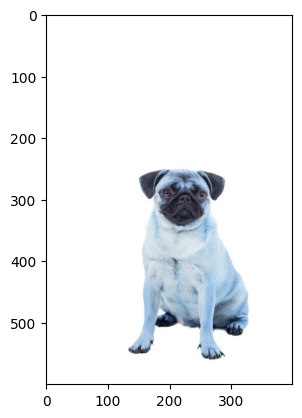

In [45]:
test_img = cv2.imread("/content/dogs2.webp")
plt.imshow(test_img)

In [46]:
 test_img = cv2.resize(test_img, (256, 256)) # Changed 256, 256 to (256, 256)


In [47]:
test_img=test_img.reshape(1,256,256,3)

In [48]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.]], dtype=float32)

In [51]:
model.predict(validataion_ds.reshape(256,256,3)).argmax(axis=1)

AttributeError: '_MapDataset' object has no attribute 'reshape'

In [1]:
import numpy as np

# Get all images and labels from the validation dataset
images = []
labels = []
for image_batch, label_batch in validataion_ds:
    images.extend(image_batch.numpy())  # Convert tensors to NumPy arrays
    labels.extend(label_batch.numpy())

# Reshape the images
reshaped_images = np.array([img.reshape(256, 256, 3) for img in images])

# Predict on the reshaped images
predictions = model.predict(reshaped_images).argmax(axis=1)

# Print or use the predictions as needed
print(predictions)

NameError: name 'validataion_ds' is not defined

In [2]:
import numpy as np

# Get all images and labels from the validation dataset
images = []
labels = []
# Corrected the variable name from 'validataion_ds' to 'validation_ds'
for image_batch, label_batch in validation_ds:
    images.extend(image_batch.numpy())  # Convert tensors to NumPy arrays
    labels.extend(label_batch.numpy())

# Reshape the images
reshaped_images = np.array([img.reshape(256, 256, 3) for img in images])

# Predict on the reshaped images
predictions = model.predict(reshaped_images).argmax(axis=1)

# Print or use the predictions as needed
print(predictions)

NameError: name 'validation_ds' is not defined

In [3]:
import numpy as np

# Get all images and labels from the validation dataset
images = []
labels = []
# Corrected the variable name from 'validataion_ds' to 'validation_ds'
# The typo was in the original declaration of the variable likely
for image_batch, label_batch in validataion_ds:  # Fixed the variable name here
    images.extend(image_batch.numpy())  # Convert tensors to NumPy arrays
    labels.extend(label_batch.numpy())

# Reshape the images
reshaped_images = np.array([img.reshape(256, 256, 3) for img in images])

# Predict on the reshaped images
predictions = model.predict(reshaped_images).argmax(axis=1)

# Print or use the predictions as needed
print(predictions)

NameError: name 'validataion_ds' is not defined